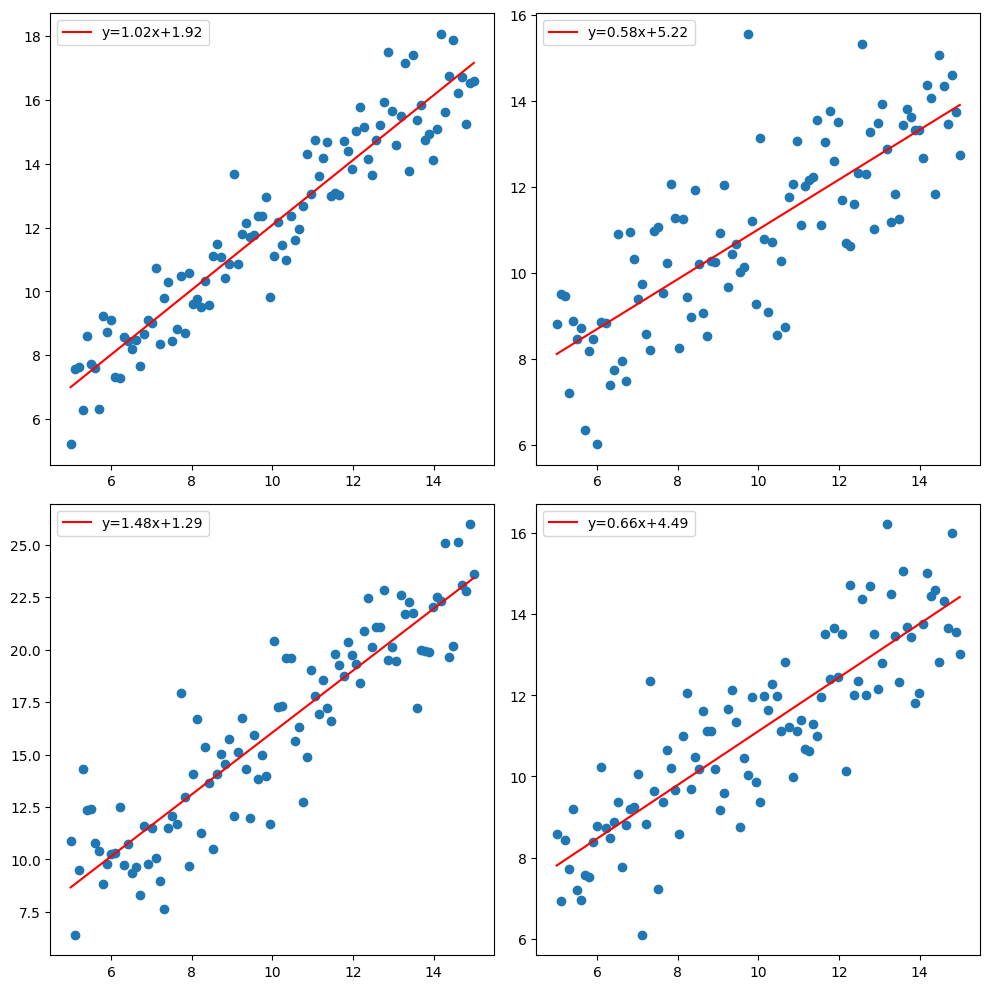

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Function to create a dataset with a linear relationship
def create_linear_data(n, slope, intercept, noise_variance):
    """
    Generates a linear dataset.

    Parameters:
    - n (int): The number of data points.
    - slope (float): The slope of the line.
    - intercept (float): The y-intercept of the line.
    - noise_variance (float): The variance of the noise added to the linear relationship.

    Returns:
    - x (ndarray): Independent variable data.
    - y (ndarray): Dependent variable data with noise.
    """
    x = np.linspace(5, 15, n)
    y = slope * x + intercept + np.random.normal(0, noise_variance, n)
    return x, y

# Create figure and axes
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

# Parameters for synthetic datasets
parameters = [
    (1.0, 2.0, 1.0),  # Dataset 1: slope, intercept, noise_variance
    (0.5, 6.0, 1.5),  # Dataset 2
    (1.5, 1.0, 2.0),  # Dataset 3
    (0.7, 4.0, 1.2)   # Dataset 4
]

# Generate and plot datasets
for ax, (slope, intercept, noise_variance) in zip(axs.flatten(), parameters):
    x, y = create_linear_data(100, slope, intercept, noise_variance)
    res = linregress(x, y)
    ax.plot(x, y, 'o')
    ax.plot(x, res.intercept + res.slope*x, 'r', label=f'y={res.slope:.2f}x+{res.intercept:.2f}')
    ax.legend()

plt.tight_layout()
plt.show()


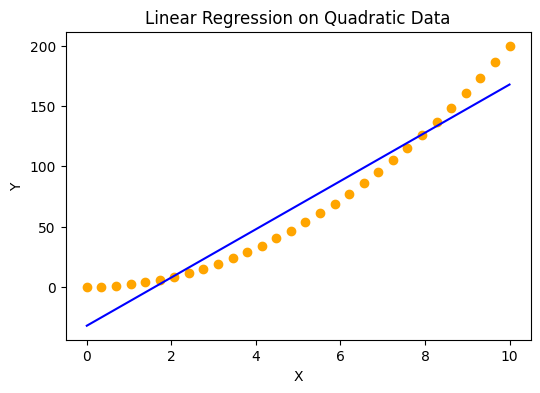

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Function to create a quadratic dataset without noise
def create_quadratic_data(n):
    """
    Generates a quadratic dataset without noise.

    Parameters:
    - n (int): The number of data points.

    Returns:
    - x (ndarray): Independent variable data.
    - y (ndarray): Dependent variable data.
    """
    x = np.linspace(0, 10, n)
    y = 2 * x**2 # Quadratic equation: y = 2x^2
    return x, y

# Generate quadratic data
x, y = create_quadratic_data(30)

# Perform linear regression
res = linregress(x, y)

# Plot data and linear fit
plt.figure(figsize=(6, 4))
plt.scatter(x, y, color='orange')
plt.plot(x, res.intercept + res.slope*x, 'b')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Linear Regression on Quadratic Data')
plt.show()


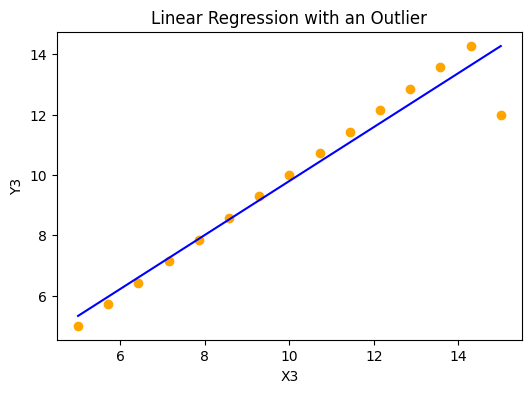

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Function to create a linear dataset with an outlier
def create_linear_data_with_outlier(n, slope, intercept, outlier_position, outlier_value):
    """
    Generates a linear dataset with one outlier.

    Parameters:
    - n (int): The number of data points.
    - slope (float): The slope of the line.
    - intercept (float): The y-intercept of the line.
    - outlier_position (int): The index of the outlier in the dataset.
    - outlier_value (float): The value of the outlier.

    Returns:
    - x (ndarray): Independent variable data.
    - y (ndarray): Dependent variable data with one outlier.
    """
    x = np.linspace(5, 15, n)
    y = slope * x + intercept
    y[outlier_position] = outlier_value  # Introduce an outlier
    return x, y

# Generate linear data with an outlier
n = 15
x, y = create_linear_data_with_outlier(n, slope=1, intercept=0, outlier_position=n-1, outlier_value=12)

# Perform linear regression
res = linregress(x, y)

# Plot data and linear fit
plt.figure(figsize=(6, 4))
plt.scatter(x, y, color='orange')
plt.plot(x, res.intercept + res.slope*x, 'b')
plt.xlabel('X3')
plt.ylabel('Y3')
plt.title('Linear Regression with an Outlier')
plt.show()


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
import ipywidgets as widgets
from IPython.display import display


def create_linear_data_with_outlier(n, slope, intercept, outlier_position, outlier_value):
    """
    Generates a linear dataset with one outlier.

    Parameters:
    - n (int): The number of data points.
    - slope (float): The slope of the line.
    - intercept (float): The y-intercept of the line.
    - outlier_position (int): The index of the outlier in the dataset.
    - outlier_value (float): The value of the outlier.

    Returns:
    - x (ndarray): Independent variable data.
    - y (ndarray): Dependent variable data with one outlier.
    """
    x = np.linspace(5, 15, n)
    y = slope * x + intercept
    y[outlier_position] = outlier_value  # Introduce an outlier
    return x, y
#
# Function to update the plot based on the slider
def update_plot(n):
    x, y = create_linear_data_with_outlier(n, slope=1, intercept=0, outlier_position=n-1, outlier_value=8)
    res = linregress(x, y)
    
    # Clear the current plot to avoid drawing over the old ones
    plt.clf()
    
    plt.scatter(x, y, color='orange', label='Data points')
    plt.plot(x, res.intercept + res.slope*x, 'b', label=f'Linear fit: y={res.slope:.2f}x+{res.intercept:.2f}')
    plt.legend()
    plt.xlabel('X3')
    plt.ylabel('Y3')
    plt.title('Linear Regression with an Outlier')
    plt.ylim([0, 15]) # Fixed y-axis for better comparison
    plt.show()

# Widget to control the number of data points n
n_slider = widgets.IntSlider(value=15, min=3, max=100, step=1, description='n =', continuous_update=False)

# Display the widget and plot
widgets.interactive(update_plot, n=n_slider)


interactive(children=(IntSlider(value=30, continuous_update=False, description='n =', min=3), Output()), _dom_…